<a href="https://colab.research.google.com/github/jk143kaur/project-nlp-business-case-automated-customers-reviews-v2/blob/main/Product_Review_NLP_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [32]:
file_path = '/content/drive/MyDrive/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'

In [33]:
import pandas as pd
from datasets import Dataset

df = pd.read_csv(file_path)

df.head()


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


Sentiment Mapping


In [34]:
def map_sentiment(star):
    if star in [1, 2]:
        return 'negative'
    elif star == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['reviews.rating'].apply(map_sentiment)

df[['reviews.text', 'reviews.rating', 'sentiment']].head()


,reviews.text,reviews.rating,sentiment
0,I thought it would be as big as small paper bu...,3,neutral
1,This kindle is light and easy to use especiall...,5,positive
2,Didnt know how much i'd use a kindle so went f...,4,positive
3,I am 100 happy with my purchase. I caught it o...,5,positive
4,Solid entry level Kindle. Great for kids. Gift...,5,positive


In [35]:
df_model = df[['reviews.text', 'sentiment']].dropna()

dataset = Dataset.from_pandas(df_model)
dataset = dataset.class_encode_column("sentiment")
dataset = dataset.train_test_split(test_size=0.2)

dataset


Casting to class labels:   0%|          | 0/5000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['reviews.text', 'sentiment'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['reviews.text', 'sentiment'],
        num_rows: 1000
    })
})

Training and classification

In [36]:
from transformers import AutoTokenizer

model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(example):
    return tokenizer(example["reviews.text"], truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)



Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [37]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate

num_labels = dataset['train'].features['sentiment'].num_classes
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3
)

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.9 MB/s eta 0:00:00


In [38]:
training_args = TrainingArguments(
    output_dir="test_trainer",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"].add_column("labels", tokenized_datasets["train"]["sentiment"]),
    eval_dataset=tokenized_datasets["test"].add_column("labels", tokenized_datasets["test"]["sentiment"]),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/tmp/ipython-input-38-4043518493.py:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jk143kaur (jk143kaur-personal) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,0.351000,0.181274,0.944000
2,0.083000,0.193485,0.953000


TrainOutput(global_step=500, training_loss=0.17615281748771666, metrics={'train_runtime': 88.5712, 'train_samples_per_second': 90.323, 'train_steps_per_second': 5.645, 'total_flos': 269112319520256.0, 'train_loss': 0.17615281748771666, 'epoch': 2.0})

In [39]:
results = trainer.evaluate(eval_dataset=tokenized_datasets['test'])
print(results)


{'eval_runtime': 1.5879, 'eval_samples_per_second': 629.766, 'eval_steps_per_second': 39.675, 'epoch': 2.0}


Accuracy, F1

In [40]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }

In [41]:
trainer.compute_metrics = compute_metrics
results = trainer.evaluate(eval_dataset=tokenized_datasets['test'])
print(results)


{'eval_runtime': 1.5612, 'eval_samples_per_second': 640.519, 'eval_steps_per_second': 40.353, 'epoch': 2.0}


Prediction


In [44]:
import torch

test_review = "The battery life is best but it overheats quickly."
inputs = tokenizer(test_review, return_tensors="pt", truncation=True, padding=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs = {k: v.to(device) for k, v in inputs.items()}
model.to(device)

outputs = model(**inputs)
prediction = torch.argmax(outputs.logits, dim=-1).item()

sentiment_map = {0: "negative", 1: "neutral", 2: "positive"}
print("Predicted sentiment:", sentiment_map[prediction])

Predicted sentiment: negative


In [45]:
model.save_pretrained("sentiment-classifier")
tokenizer.save_pretrained("sentiment-classifier")


('sentiment-classifier/tokenizer_config.json',
 'sentiment-classifier/special_tokens_map.json',
 'sentiment-classifier/vocab.txt',
 'sentiment-classifier/added_tokens.json',
 'sentiment-classifier/tokenizer.json')

In [47]:
df = pd.read_csv(file_path)

product_titles = df['name'].dropna().drop_duplicates().tolist()

product_titles = product_titles[:1000]


In [48]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(product_titles, show_progress_bar=True)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Product category clustering


In [49]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(embeddings)


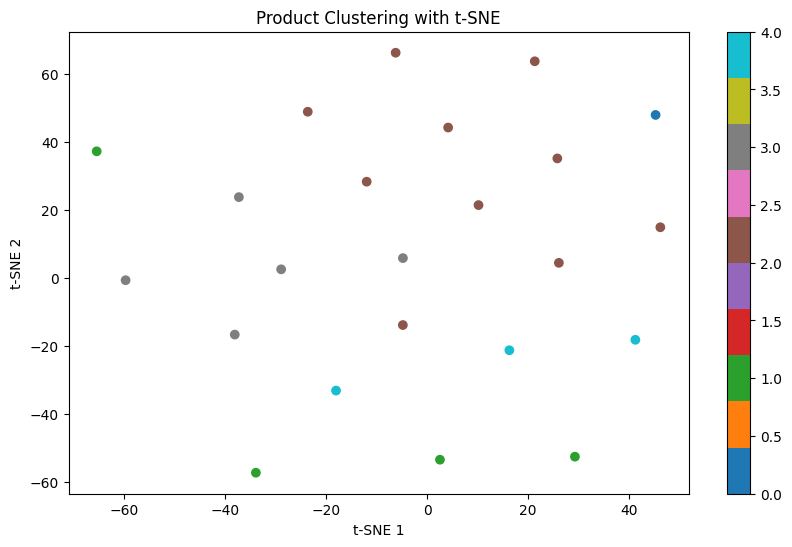

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0, perplexity=20)
reduced_embeddings = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1], c=clusters, cmap='tab10')

plt.title("Product Clustering with t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(scatter)
plt.show()

In [51]:
labels = dataset["train"]["sentiment"][:len(reduced_embeddings)]


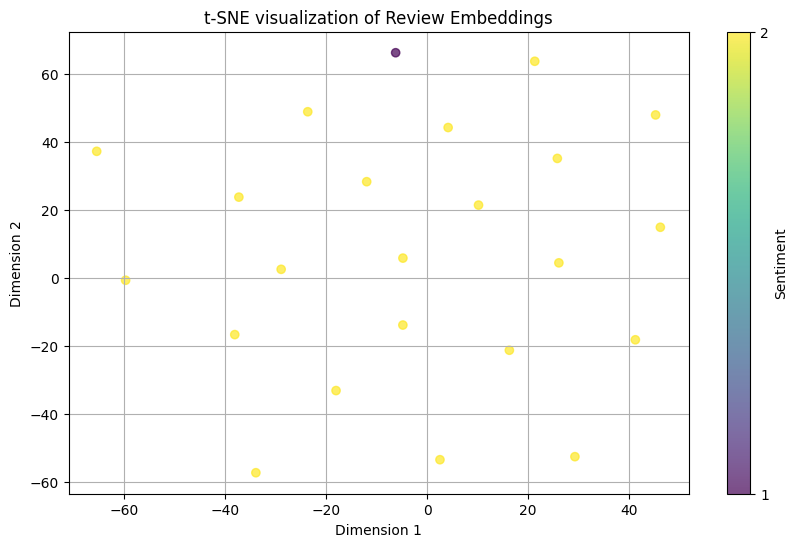

In [52]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels[:len(reduced_embeddings)], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1, 2], label='Sentiment')
plt.title("t-SNE visualization of Review Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

Summarization


In [53]:

from transformers import pipeline
from collections import Counter


print("Available Categories:", df['primaryCategories'].head(20))
category = "Electronics"  # Or pick from printed list
category_df = df[df['primaryCategories'] == category].dropna(subset=['reviews.text', 'reviews.rating'])

if category_df.empty:
    print(f"No reviews found for category: {category}")
else:
    grouped = category_df.groupby('name')

    products_info = []
    for name, group in grouped:
        reviews = group['reviews.text'].tolist()
        avg_rating = group['reviews.rating'].astype(float).mean()
        products_info.append({
            'name': name,
            'avg_rating': avg_rating,
            'reviews': reviews
        })

    sorted_products = sorted(products_info, key=lambda x: x['avg_rating'], reverse=True)

    if len(sorted_products) < 4:
        print("Not enough products to summarize top 3 and worst.")
    else:
        top_3 = sorted_products[:3]
        worst = sorted_products[-1]
        print("Ready to summarize.")


Available Categories: 0     Electronics
1     Electronics
2     Electronics
3     Electronics
4     Electronics
5     Electronics
6     Electronics
7     Electronics
8     Electronics
9     Electronics
10    Electronics
11    Electronics
12    Electronics
13    Electronics
14    Electronics
15    Electronics
16    Electronics
17    Electronics
18    Electronics
19    Electronics
Name: primaryCategories, dtype: object
Ready to summarize.


Summary generation


In [54]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def generate_summary(top_3, worst):
    article = f"## Recommended Products in {category}\n\n"
    article += "### 🔝 Top 3 Products:\n"

    for i, product in enumerate(top_3, 1):
        sample_reviews = " ".join(product['reviews'][:5])
        article += f"**{i}. {product['name']}**\n\n"
        article += f"Average Rating: {round(product['avg_rating'], 2)}\n\n"
        article += f"Highlights:\n"

        summary = summarizer(sample_reviews, max_length=130, min_length=30, do_sample=False)[0]['summary_text']
        article += summary + "\n\n"

    article += "### 🆚 Key Differences:\n"
    for i in range(len(top_3) - 1):
        article += f"- {top_3[i]['name']} vs {top_3[i+1]['name']}\n"

    # Top complaints for each product
    article += "### ❗ Top Complaints:\n"
    for product in top_3:
        negative_reviews = [rev for rev in product['reviews'] if "not" in rev.lower() or "bad" in rev.lower()][:5]
        if negative_reviews:
            complaints_summary = summarizer(" ".join(negative_reviews), max_length=100, min_length=30, do_sample=False)[0]['summary_text']
            article += f"- **{product['name']}**: {complaints_summary}\n"

    # Worst product
    article += f"\n### 🚫 Worst Product: **{worst['name']}**\n"
    article += f"Average Rating: {round(worst['avg_rating'], 2)}\n"
    worst_reviews = " ".join(worst['reviews'][:5])
    worst_summary = summarizer(worst_reviews, max_length=100, min_length=30, do_sample=False)[0]['summary_text']
    article += f"Why to avoid: {worst_summary}\n"

    return article

# Generate the final article
final_article = generate_summary(top_3, worst)
print(final_article)


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Your max_length is set to 130, but your input_length is only 83. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=41)
Your max_length is set to 100, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


## Recommended Products in Electronics

### 🔝 Top 3 Products:
**1. Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player**

Average Rating: 5.0

Highlights:
A lazy mans drean when it is combined with Alexa. Works great. One in each of the main rooms. If you get the harmony hub you can really impress with home automation.

**2. Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders**

Average Rating: 4.86

Highlights:
This worked great. It charges my Kindle fire in just a few hours. This solved the problem of my daughter's lost kindle charger. Took 30 minutes to being my kindle back to life.

**3. Kindle Oasis E-reader with Leather Charging Cover - Black, 6" High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers**

Average Rating: 4.82

Highlights:
This is the best kindle ereader yet. The size and weight make it perfect for comfortable reading. You will find yourself reading more books th